#1. Análise Exploratória

O que será visto:

- Importar os dados;

- Visualizar o número de atributos e amostras/exemplos dos nossos dados;

- Visualizar as primeiras amostras dos dados;

- Extrair parâmetros estatísticos básicos;

- Gerar uma matriz de correlação para verificar a relação entre os atributos;

- Normalizar e desnormalizar os nossos dados.

##Importando e analisando os dados

Imagine que você trabalha numa empresa de logística e recebeu uma base de dados e a tarefa de organizar os vinhos.

In [ ]:
#Para gerar os gráficos, instalaremos o plotly
!pip install plotly

In [ ]:
#Importando apenas os pacotes do plotly que serão necessários
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [ ]:
#Carregando o arquivo
df = pd.read_csv('Wine.csv')

In [ ]:
#Vendo a forma do dataframe e as primeiras linhas
print("O dado possui", df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
#Passar o nome de alguns atributos para português, para facilitar inclusive para outras pessoas...
#...que venham a trabalhar com esses dados
df = df.rename(columns = {'Alcohol': 'Alcool', 'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor',
                            })

In [ ]:
#Verificando as colunas renomeadas
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


##Analisando os dados

In [ ]:
#Análise dos dados, dando uma olhada inicial na média, desvio padrão e quartiz.
#Ex.: Flavanoids e Total_Phenols tem valores pr´ximos de média e quartiz 25%. Indica que...
#...pode haver forte correlação e não precisemos de ambos os atributos para o agrupamento que queremos.
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


##Atributos com informação importante

In [ ]:
#Imagina que queremos saber a relação entre os atributos, para saber quais são realmente fundamentais pro dataframe
#Usaremos a matriz de correlação

matriz_corr = df.corr()

In [ ]:
#Veja que retorna uma matriz na forma de dataframe
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
#Mas esse formato de dataframe não é o melhor para visualizar
#Vamos usar uma biblioteca não nativa do python, chamada biokit

!pip install biokit

     |████████████████████████████████| 162 kB 5.3 MB/s 
     |████████████████████████████████| 47 kB 3.8 MB/s 
     |████████████████████████████████| 1.0 MB 43.1 MB/s 
     |████████████████████████████████| 2.3 MB 33.0 MB/s 
     |████████████████████████████████| 51 kB 199 kB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 45.2 MB/s 
     |████████████████████████████████| 5.8 MB 29.0 MB/s 
     |████████████████████████████████| 251 kB 53.3 MB/s 
     |████████████████████████████████| 127 kB 35.2 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=632eb86a7d0951b1d7b203de790279fc39a2c8a4c5e0b1be0cc237e68a39ba3a
  Stored in directory: /root/.cache/pip/wheels/2f/30/fe/0a5e0df22f6ac201067237923fbad60309bb6f7dc68ff6b346
  Created wheel for bioservices: filename=bioservices-1.8.4-py3-none-any.whl size=231822 sha256=190c13791cff7beec1e85163ce037473300729c48ba8f1ee3d56524bc0fa6659
  Stored

In [ ]:
#Importando o pacote necessário da biblioteca biokit
from biokit.viz import corrplot
#Como ferramenta gráfica, usaremos o matplotlib
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


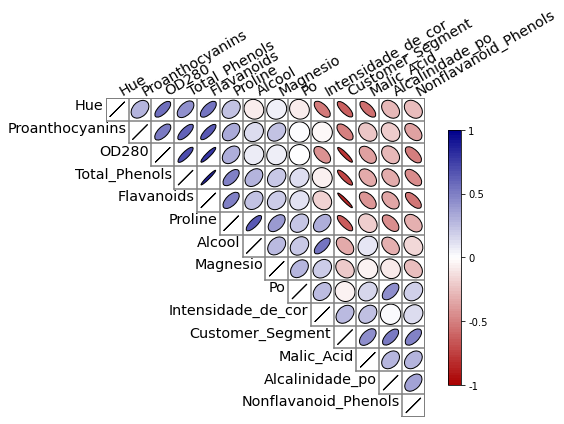

In [ ]:
#Criando o gráfico de correlação
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large') #definir como matriz de correlação superior (upper), com desenhos de elipse no gráfico  e com fonte grande
fig = plt.gcf() #utilizando o matplotlib para pegar a figura
fig.set_size_inches(13,8) #alterando o tamanho da figura para 13 x 8 polegadas
fig.show() #Comando matplotlib para mostrar a figura

In [ ]:
#Analisando o gráfico:
#Em azul são os atributos com correlação positiva. Em vermelho, negativa.
#Quanto mais próximo de uma linha reta o desenho, maior a nossa correlação.
#Como comentado antes, Flavanoids e Total_Phenols tem correlação positiva bem próxima de 1 (linha azul quase reta)
#Nesse caso, poderemos considerar apenas 1 deles e ocupar menos espaço e até criar um modelo de IA menor.

##Normalização Manual

In [ ]:
#Os atributos variam de forma diferente.
#O máximo de 'Alcool' é 14.83, já o máximo de Proline é 1680.
#A maioria dos modelos de IA e clusterização não trabalham bem com dados que variam de maneira diferente
#Para resolver esse problema, colocaremos os dados variando numa mesma faixa (0 a 1, -1 a 1, etc)
#Esse é o processo de normalização

atributos = df.columns
atributos

Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
type(atributos)

pandas.core.indexes.base.Index

In [ ]:
#Faremos a normalização min_max_scaler (normalização pelo mínimo e máximo)
#Com isso, todos os nossoa tributos estarão variando de 0 a 1
for atributo in atributos:
  df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo]) - min(df[atributo]))


In [ ]:
#Verificando as 5 primeiras amostras.
#Note que estão variando de 0 a 1.
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [ ]:
#Outro modo de visualizar é com o df.describe()
#Veja que o máximo de todo atributo é 1 e o mínimo é 0

df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Normalização Sklearn

In [ ]:
#Outra forma de normalizar é utilizar biblioteca já pronta, que inclusive possuem mais métodos

from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() #Quando usarmos o 'fit' com nossos dados nessa função, retornará um numpy array
np_df = min_max_scaler.fit_transform(df) #Passando nosso dataframe 'df'


In [ ]:
#Agora que temos o numpy array, tranformaremos num dataframe do pandas
df = pd.DataFrame(np_df, columns=atributos)

In [ ]:
#Verificando a normalização. Veja que é igual à feita manualmente
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#O bom de usar bibliotecas prontas, é que posso voltar aos valores originais (desnormaliza o DataFrame)
#Também retorna um numpy array, e precisamos transformá-lo em DataFrame pandas
np_df = min_max_scaler.inverse_transform(df)

In [ ]:
#Tranformando o numpy array em DataFrame pandas
df = pd.DataFrame(np_df, columns=atributos)

In [ ]:
#Verificando os dados originais novamente, após a desnormalização
#Note que o 'Alcohol' voltou a ter valor máximo de 14.83 e o Proline de 1680
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Normalização StandardScaler

Esse normalizador escala os nossos dados, subtraindo dos atributos a média de cada um e dividindo pelo desvio padrão.

https://scikit-learn.org/stable/modules/preprocessing.html#normalization

In [ ]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,8.357859e-17,8.607347e-17,-2.557255e-16,1.684046e-16,1.091511e-16,-3.492836e-17,2.806744e-16,-3.118604e-17,2.931488e-16,8.732091e-18,3.592632e-16,-2.245395e-16,2.788032e-16,-9.056426e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-1.213944e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-1.213944e+00
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,7.996036e-02
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,1.373864e+00
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,1.373864e+00


#2. K-means

O que será visto:

- Importar a biblioteca k-means do sklearn;

- Realizar a clusterização k-means para dois valores de k;

- Visualizar a diferença que ocorre na clusterização devido à inicialização dos clústeres;

- Visualizar o agrupamento em duas dimensões;

- Visualizar o agrupamento em três dimensões;

- Adicionar nome aos eixos do nosso agrupamento ao nosso gráfico;

- Adicionar o centro dos grupos no gráfico.

##Introdução ao K-means

In [ ]:
#Uma vez que fizemos o tratamento de normalização dos dados, vamos começar o agrupamento.
#Começaremos com a técnica K-means, que é muito leve e poderosa

from sklearn.cluster import KMeans
#instanciar um clusterizador, que recebe como argumento o nº de clusters
#Seu chefe, quando passou a base de vinhos, falou que existiam grupos de 2 a 4 consumidores.
#Começaremos com 4 (que será o nº de grupos a agrupar nossos vinhos)
agrupador = KMeans(n_clusters = 4)

In [ ]:
#Depois instaciar, usaremos o método fit. PAssaremos nossos dados e seus atributos
agrupador.fit(df)

KMeans(n_clusters=4)

In [ ]:
#Para verificar como nosso método agrupou os dados, podemos fazer labels (nomes dos grupos)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 2 3 3 2 2 3 2 3 2 3
 3 2 2 2 3 3 2 3 2 1 3 2 2 2 2 2 2 2 2 3 3 3 3 2 3 3 2 2 3 2 2 2 2 2 2 3 3
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Note que temos 4 grupos, de 0 a 3.
#Se rodarmos o agrupador novamente, vemos que o nº dos clusters foram invertidos...
#...pois depende do ponto de onde o algoritmo começa
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 0 2 0 2 2 2 0 2 0 2 0
 0 2 2 2 0 0 2 2 2 1 0 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


##Visualizando os clusters em duas dimensões

In [ ]:
#Agora queremos verificar graficamente o resultado da clusterização
#Podemos usar o plotly
#Criaremos uma fig, através do go.figure (grafic object)
#Depois adicionaremos um gráfico a nossa figura
#Faremos um scatter, de modo que conseguiremos visualizar de 2 em 2 atributos
#O máximo de atributos que conseguimos visualizar em um gráfico são 3 (3 dimensões)
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'], 
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



##Visualizando os clusters em duas dimensões para 3 grupos (k=3)

In [ ]:
#Olhando para o gráfico anterior, parece que os grupos não ficaram muito separados.
#Um pouco disso é porque colocamos em 2D (vendo 2 atributos dos 8 possíveis)
#Vamos colocar o nº de grupos para 3
agrupador = KMeans(n_clusters=3)
agrupador.fit(df)
labels = agrupador.labels_
print(labels) #Verificar se há 3 grupos. Como vemos, sim: de 0 a 2 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Visualizar graficamente
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
#Desse modo, podemos apresentar 2 resultados ao chefe:
#Com 4 agrupamentos e com 3 agrupamentos (que parece fazer mais sentido)

##Visualizando os clusters em três dimensões

In [ ]:
#Imagine que agora eu queira mostrar 3 atributos em 1 gráfico (3 dimensões)
#Dessa maneira, consegue colocar mais informação e mais explicativo
#Seguiremos o procedimentos do gráfico 2D. A diferença é que usaremos o 'Scatter3d'

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color= labels.astype(np.float)),
                           text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
#Adicionando o nome dos eixos
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'
))
fig.show()

In [ ]:
#Agora ficou um gráfico bacana para fazer uma apresentação.

##Analisando os cluster em três dimensões

In [ ]:
#Esquecemos de colocar os centros dos clusters, que fica legal

centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos #nome das colunas
centros.head()
#Temos então os clusters 0, 1 e 2

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,-0.922126,-0.378889,-0.465688,0.175507,-0.470251,-0.073934,0.044288,0.008761,0.018265,-0.862278,0.424503,0.249782,-0.765250,0.079960
1,0.186543,0.904971,0.249210,0.583703,-0.050635,-0.988557,-1.236195,0.716842,-0.749608,0.988498,-1.191299,-1.301540,-0.380045,1.347458
2,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347,-1.171521


In [ ]:
#Para adicionar esses centros nas figuras, precisamos adicionar um novo traço
fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))#labels dos centros, na mesma ordem que apareceu no dataframe dos centros
fig.show()  

In [ ]:
#O centro do cluster 1 está bem definido (separado), com 3 atributos.
#Já os cluster 0 e 2 estão bem próximos, o que mostra que 3 atributos não são suficientes para...
#...visualizarmos bem nossa clusterização. 

#Percebemos também que há pontos que ficam numa região de conflito (cluster 2 e 0), o que pode indicar...
#...que a clusterização não tenha sido tão boa.
#Mas lembre-se: estamos visualizando apenas 3 atributos.
#Só teremos uma noção melhor disso quando usarmos uma métrica matemática, que não seja visual, para analisar isso.

##Prevendo o clúster de novas amostras

Uma vez realizada a clusterização com o método .fit(), podemos prever como determinada amostra seria classificada através da utilização do método .predict(), conforme o exemplo abaixo.

In [ ]:
nova_amostra = [2,0,1.5,27,4,14,38,0.7,10, 1, 4, 16,12]
label_nova_amostra = agrupador.predict(nova_amostra)
print(label_nova_amostra)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



ValueError: ignored

Como visto, apresentou um erro no passo anterior.

Há um dado a menos no array (shape requer 14 elementos).

No fórum[https://cursos.alura.com.br/forum/topico-erro-no-predict-164727], sugeriu-se a seguinte resposta:

Tive o mesmo problema que você, mas pude resolver colocando colchetes em volta de "nova_amostra". Além disso, foi necessário adicionar um elemento a mais na amostra que foi dada, pois tinham apenas 13 elementos, sendo necessários 14.

In [ ]:
nova_amostra = [2,0,1.5,27,4,14,38,0.7,10, 1, 4, 16,12, 3]
label_nova_amostra = agrupador.predict([nova_amostra])
print(label_nova_amostra)

[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



Como visto, a solução sugerida não funcionou.

Solução que desenvolvi:

In [ ]:
#Inserir os 14 elementos (foi adicionado o 14º, pois a questão não trouxe) ao DataFrame, com os mesmos atributos (colunas)
df2 = pd.DataFrame([nova_amostra], columns = atributos)
df2.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,2.0,0.0,1.5,27.0,4.0,14.0,38.0,0.7,10.0,1.0,4.0,16.0,12.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.0,0.0,1.5,27.0,4.0,14.0,38.0,0.7,10.0,1.0,4.0,16.0,12.0,3.0
25%,2.0,0.0,1.5,27.0,4.0,14.0,38.0,0.7,10.0,1.0,4.0,16.0,12.0,3.0
50%,2.0,0.0,1.5,27.0,4.0,14.0,38.0,0.7,10.0,1.0,4.0,16.0,12.0,3.0
75%,2.0,0.0,1.5,27.0,4.0,14.0,38.0,0.7,10.0,1.0,4.0,16.0,12.0,3.0
max,2.0,0.0,1.5,27.0,4.0,14.0,38.0,0.7,10.0,1.0,4.0,16.0,12.0,3.0


In [ ]:
#Aplicando a normalizando aos dados
np_df2 = standard_scaler.transform(df2)
df2 = pd.DataFrame(np_df2, columns = atributos)
df2.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
mean,6.953778,-1.432983,6.574069,154.618261,23.750254,62.947415,179.138516,1.121212,53.472033,3.435432,19.490974,59.800448,52.082735,6.54948
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.953778,-1.432983,6.574069,154.618261,23.750254,62.947415,179.138516,1.121212,53.472033,3.435432,19.490974,59.800448,52.082735,6.54948
25%,6.953778,-1.432983,6.574069,154.618261,23.750254,62.947415,179.138516,1.121212,53.472033,3.435432,19.490974,59.800448,52.082735,6.54948
50%,6.953778,-1.432983,6.574069,154.618261,23.750254,62.947415,179.138516,1.121212,53.472033,3.435432,19.490974,59.800448,52.082735,6.54948
75%,6.953778,-1.432983,6.574069,154.618261,23.750254,62.947415,179.138516,1.121212,53.472033,3.435432,19.490974,59.800448,52.082735,6.54948
max,6.953778,-1.432983,6.574069,154.618261,23.750254,62.947415,179.138516,1.121212,53.472033,3.435432,19.490974,59.800448,52.082735,6.54948


In [ ]:
#Os valores ficaram estranhos, pois aparentemente os dados passados pela questão são bem desconexos com a realidade do treino do standardscaler.
#Aplicando a predição aos dados normalizados
#Como visto, o modelo de clusterização previu o grupo 2 para os dados.

label_nova_amostra = agrupador.predict(df2)
print(label_nova_amostra)


[2]


Para mais referências de normalização, também podemos consultar a documentação oficial do sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#3. DBSCAN

O que será visto:

- Importar a biblioteca DBSCAN do sklearn;

- Realizar a clusterização DBSCAN configurando os valores de eps e min_samples;

- Visualizar o impacto na clusterização causado pela variação nos parâmetros;

- Visualizar o agrupamento em três dimensões.

##Exemplo de introdução ao DBSCAN

Imagine que agora você queira testar outras técnicas de clusterização para fazer uma análise mais aprofundada. Temos o DBSCAN.

DBSCAN = Agrupamento Espacial Baseado em Densidade de Aplicações com Ruído

Mas antes, vamos carregar os dados novamente, renomear as colunas e aplicar a normalização.


In [ ]:
#Carregando o arquivo
df = pd.read_csv('Wine.csv')

In [ ]:
#Vendo a forma do dataframe e as primeiras linhas
print("O dado possui", df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
#Passar o nome de alguns atributos para português, para facilitar inclusive para outras pessoas...
#...que venham a trabalhar com esses dados
df = df.rename(columns = {'Alcohol': 'Alcool', 'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor',
                            })

Normalização StandardScaler

Esse normalizador escala os nossos dados, subtraindo dos atributos a média de cada um e dividindo pelo desvio padrão.

https://scikit-learn.org/stable/modules/preprocessing.html#normalization

In [ ]:
from sklearn import preprocessing

atributos = df.columns

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18,-9.056426e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-1.213944e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-1.213944e+00
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,7.996036e-02
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,1.373864e+00
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,1.373864e+00


Agrupamento com DBSCAN

Com os dados normalizados, aplicamos a clusterização.

In [ ]:
from sklearn.cluster import DBSCAN

#Intanciar o agrupador
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan') 
#eps = distância máxima entre 2 pontos, para que possam ser considerados vizinhos ou pertencentes ao mesmo cluster
#min_samples = nº mínimo de pontos para que eu possa formar um cluster
#metric = métrica de distância, ou seja, uma forma de avaliar distância entre os pontos

#Treinar o agrupador
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

NOTA: Diferente do K-means, não passamos o nº de clusters. Passamos os parâmetros e ele encontra os clusters de acordo com essas 'regras'. 

A grande dificuldade no DBSCAN, muitas vezes, é decidir o 'eps' e o 'min_samples', pois varia bastante de acordo com a densidade dos dados.

In [ ]:
#Verificar os labels
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#Verificar o nº de clusters
np.unique(agrupador.labels_)

array([-1])

O DBSCAN atribui um label '-1', que significa que a amostra ou o dado foi classificado como 'ruído' (pois o DBSCAN é feito para aplicações com ruído. Considera que qualquer ponto que não esteja dentro dessa distância do 'eps' é um ruído).

Como tudo foi classificado como ruído (-1), a distância máxima passada (eps) pode ter sido incoerente.

Vamos testar com os mesmos parâmetros indicados no curso, mas com os dados desnormalizados.

In [ ]:
import pandas as pd

#Recarregando o arquivo
df = pd.read_csv('Wine.csv')

In [ ]:
#Renomear as colunas
df = df.rename(columns = {'Alcohol': 'Alcool', 'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor',
                            })

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN

#Intanciar o agrupador
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan') 
#eps = distância máxima entre 2 pontos, para que possam ser considerados vizinhos ou pertencentes ao mesmo cluster
#min_samples = nº mínimo de pontos para que eu possa formar um cluster
#metric = métrica de distância, ou seja, uma forma de avaliar distância entre os pontos

#Treinar o agrupador
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [ ]:
#Verificar os labels
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
import numpy as np

#Verificar o nº de clusters
np.unique(agrupador.labels_)

array([-1])

Continua com ruído (-1). Talvez precisemos ajustar os parâmetros.

##Introdução ao DBSCAN

Aprofundando um pouco mais no DBSCAN.

DBSCAN = Density-Based Spatial Clustering of Applications with Noise

(Algoritmo de agrupamento espacial baseado em densidade para aplicações com ruído)

Baseado no agrupamento de pontos em regiões de alta densidade, ou seja, sempre que tiver uma região com muitos pontos, dadas algumas condições, considero um cluster ou grupo.

O problema que ele se propõe a resolver: Tendo um conjunto de pontos C (todos os nossos vinhos), deseja-se agrupar os N pontos desse conjunto (os 173 vinhos dados de vinhos) em grupos de densidade específica.

Porque utilizar?

O K-means não funciona legal quando os clusters não tem simetria radial, ou seja, não são próximos de uma bolinha, quando não dá para separá-los por uma bolinha.

Na imagem abaixo percebemos que os clusters não podem ser separados por uma bolinha (círculo):

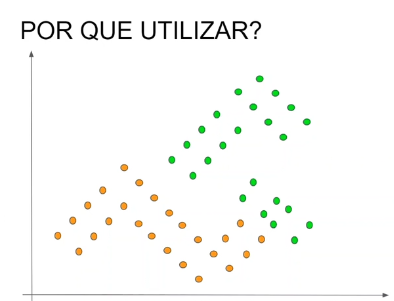

Com isso, o K-means acaba classificando isso errado.

Nesse contexto, o que o DBSCAN faz de diferente?

Primeiro, ele define uma distância mínima para que os pontos sejam considerados vizinhos. Essa distância é o EPS.

Além disso, ele define o nº mínimo de pontos dentro de um grupo para que seja considerado um cluster.

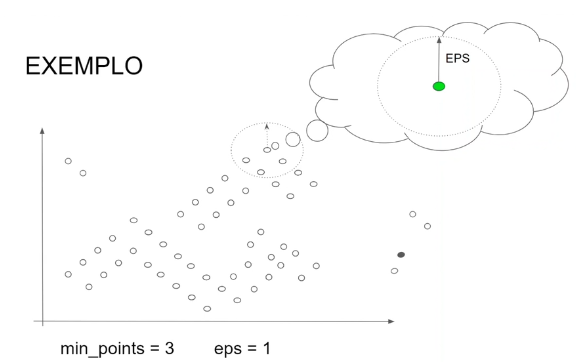

Então ele inicializa em uma amostra aleatória, verifica todos os vizinhos dessa amostra, e vai fazendo isso até que ele encontre uma amostra que não tenha mais vizinho, ou seja, não pode mais expandir. Aí o algoritmo para, conta o nº de pontos classificados no mesmo grupo e, se o nº de pontos for maior que 'min_points', ele declara que é um cluster válido.


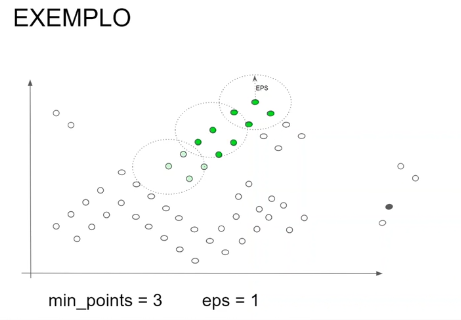

Depois disso, ele começa em outra bolinha aleatória e repete o mesmo processo, até o momento em que ele encontre uma amostra que não encontra mais vizinhos.

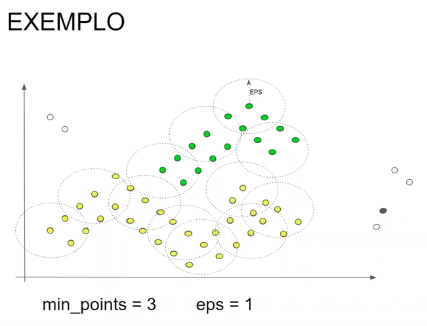

E porque ele é um algoritmo para ser aplicado em regiões com ruído?

Depois que vimos os 2 clusters na imagem (amarelo e verde), vemos 2 pontos (esquerda) que são vizinho, mas são menores que 'min_points'. Então provavelmente são ruído e assim o algoritmo os classifica. 

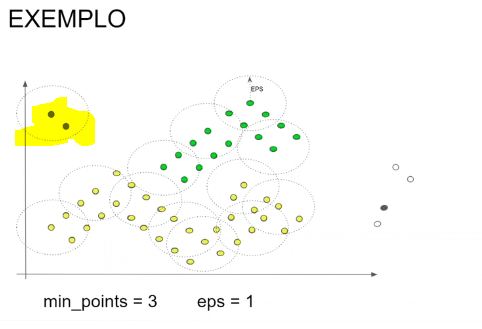



Veja o algoritmo se expandindo...

Começa no vermelho e vai expandindo até o momento em que não encontra mais vizinhos... daí ele começa em outro ponto aleatório e vai expandindo novamente.

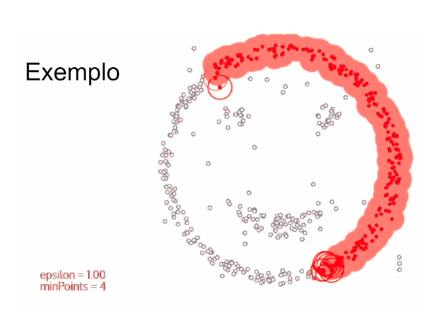

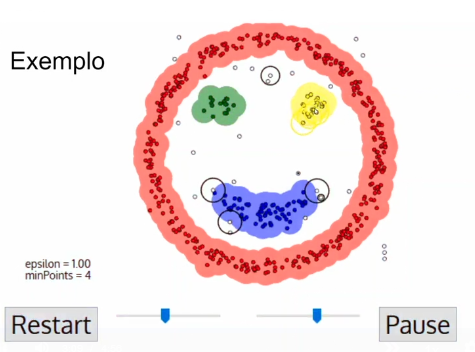

Note que ele consegue fazer agrupamentos com formatos bem interessantes.

O OBJETIVO DO DBSCAN

Fazer com que cada grupo tenha pelo menos um número mínimo, ou densidade mínima, de pontos vizinhos, considerando como condição de vizinhança uma distância menor ou igual a EPS.

PORQUE UTILIZAR O DBSCAN?

O K-means não costuma apresentar um bom resultado quando há ruído e grupos de simetria não radial.

VANTAGENS DO DBSCAN

- Robusto a outliers (robusto a ruído)

- Pode detectar qualquer tipo de forma de cluster

- Custo computacional não é tão alto

- Segundo algoritmo de clusterização mais utilizado (muito popular)



DESVANTAGENS DO DBSCAN

- Não funciona bem com dados de alta dimensionalidade (assim como o K-means. Quando temos muitos atributos: 15, 20, 30... não funciona bem pois as métricas de distância acabam perdendo o sentido.)

- Não consegue identificar clusters de várias densidades, uma vez que os parâmetros 'eps' e 'min_samples' são fixos. (Se fossem variáveis de alguma forma, talvez eles conseguissem fazer isso)

- A parametrizaçaõ de 'eps' e 'min_samples' nem sempre é uma tarefa fácil. (Tem que verificar como seus dados estão distribuídos, para ver quais seriam os valores razoáveis)

##Variando os parâmetros do DBSCAN

Verificaremos como o agrupamento realizado pelo DBSCAN é sensível aos parâmetros do próprio modelo.

In [ ]:
#instanciar o agrupador
agrupador = DBSCAN(eps = 0.01, min_samples = 15, metric = "manhattan")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Como podemos perceber, todos os nosso dados foram considerados ruído.

E porque aconteceu?

Quando usamos um valor muito pequeno de EPS, falamos que vizinhos eram amostrar que estivessem muito perto. E provavelmente temos poucas amostrar desse jeito.

E lembrando que para eu considerar um cluster, preciso de pelo menos 15 amostras.

O DBSCAN pega as amostras e vai verificando todas as que tem vizinhos...uma corrente vai sendo formada, até o ponto em que tenho amostra que não tem mais vizinho. Nesse momento ele para. Se nessa corrente que o DBSCAN formou houver ao menos 15 eles, temos um cluster. No nosso caso, não formamos uma corrente com pelo menos 15 elos, e então todas as amostras foram consideradas ruído.

Vamos então aumentar 'eps' para 10 e verificar.

Mas antes, vamos efetuar uma normalização.


In [ ]:
from sklearn import preprocessing

atributos = df.columns

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18,-9.056426e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-1.213944e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-1.213944e+00
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,7.996036e-02
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,1.373864e+00
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,1.373864e+00


In [ ]:
#instanciar o agrupador
agrupador = DBSCAN(eps = 10, min_samples = 15, metric = "manhattan")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

Veja que a maioria dos pontos foi considerado em um cluster, e outros pontos considerados ruídos.

Isso era esperado, pois a distância para ser considerado vizinho ficou muito grande, de modo que formamos uma corrente gigantesca com praticamente todos os nossos dados.

Vamos então diminuir o 'eps' e aumentar o 'min_samples' e verificar.


In [ ]:
#instanciar o agrupador
agrupador = DBSCAN(eps = 1.5, min_samples = 30, metric = "manhattan")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Neste caso, fiquei com apenas ruídos. Vamos diminuir o 'min_samples' novamente.

In [ ]:
#instanciar o agrupador
agrupador = DBSCAN(eps = 1.5, min_samples = 15, metric = "manhattan")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

E continua tudo como ruído. Vamos aumentar o 'eps'.

In [ ]:
#instanciar o agrupador
agrupador = DBSCAN(eps = 12, min_samples = 15, metric = "manhattan")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Note que agora tudo ficou em um único cluster. Portanto, vemos que os parâmetros interferem demais na clusterização.

Vamos falar do parâmetro 'metric', que é o tipo de distância.

A distância 'manhattan' vai sempre em linha reta: linhas horizontais e verticais. Se mudarmos para distância euclidiana ('euclidean'), vamos ver como se comporta.

In [ ]:
#instanciar o agrupador
agrupador = DBSCAN(eps = 12, min_samples = 15, metric = "euclidean")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Aqui continuou como apenas 1 cluster, mas é um parâmetro que pode alterar o cluster, pois interfere em como se calcula a distância (eps).

Vamos rodar os mesmos parâmetros para ambas as métricas de distância.

In [ ]:
#EUCLIDEAN

#instanciar o agrupador
agrupador = DBSCAN(eps = 3, min_samples = 15, metric = "euclidean")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#MANHATTAN

#instanciar o agrupador
agrupador = DBSCAN(eps = 3, min_samples = 15, metric = "manhattan")
#realizar a clusterização
agrupador.fit(df)
#analisar os labels
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Vejam que na distância euclidiana, tivemos 2 clusters e alguns ruídos.

Já na distância manhattan tudo foi considerado ruído.

O que pudemos perceber:

- EPS e MIN_SAMPLES variam de maneira inversamente proporcional: o efeito que causo aumentando EPS é o mesmo que causo diminuindo MIN_SAMPLES.

- E a métrica de distância também influencia, pois afeta o cálculo do EPS.


Para saber mais: outras métricas de distância



Existem outras métricas de distância, além das apresentadas aqui, como distância cosseno e outras. Para alterar no algoritmo, basta fazer como na aula, alterar o parâmetro metric. As métricas de distância permitidas são:

    Do scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
    Do scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]

Para mais referências de métricas de distância, também podemos consultar a documentação oficial da biblioteca sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances



#4. Mean shift

O que será visto:

- Importar a biblioteca Mean shift do sklearn;

- Realizar a clusterização Mean-shift de modo não paramétrico;

- Estimar a largura de banda;

- Visualizar os efeitos dos valores da largura de banda no agrupamento realizado pelo método.

##Introdução ao Mean-Shift

Após ter que parametrizar tanta coisa no DBSCAN, uma coisa que deveríamos nos preocupar é se há algum método de clusterização que podemos usar sem ter que parametrizar tanta coisa ou nada.

Dizem que esse método é o Mean-Shift.

Antes, vamos carregar os dados novamente.

In [ ]:
import pandas as pd

#Recarregando o arquivo
df = pd.read_csv('Wine.csv')

In [ ]:
#Renomear as colunas
df = df.rename(columns = {'Alcohol': 'Alcool', 'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor',
                            })

Agora começamos com o MeanShift

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
#Instanciar o meanshift
#Como ele é não paramétrico, a princípio não passaremos nenhum parâmetro
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
import numpy as np

#Verificar o nº de clusters
np.unique(agrupador.labels_)

array([0, 1, 2])

Todos os nossos dados foram clusterizados em 3 grupos diferentes, sem termos parametrizado nada.

Vamos entender melhor como o Mean-Shift funciona.

MEAN-SHIFT

Diferentemente do K-means, o Mean-Shift não requer a especificação do número de clusters.

Assim como o DBSCAN, procura regiões de alta densidade e afirma que ali existem clusters.

O PROBLEMA

Qual o problema que o mean-shift se propõe a resolver? É o mesmo do DBSCAN:

Tendo um conjunto de pontos C, deseja-se agrupar os N pontos desse conjunto em grupos de máxima densidade.

E porque se chama mean-shift ou deslocamento de média?

Porque ele começa com cada ponto sendo um cluster, faz a média dos pontos dentro de uma espécie de circunferência que ele cria para cada ponto.

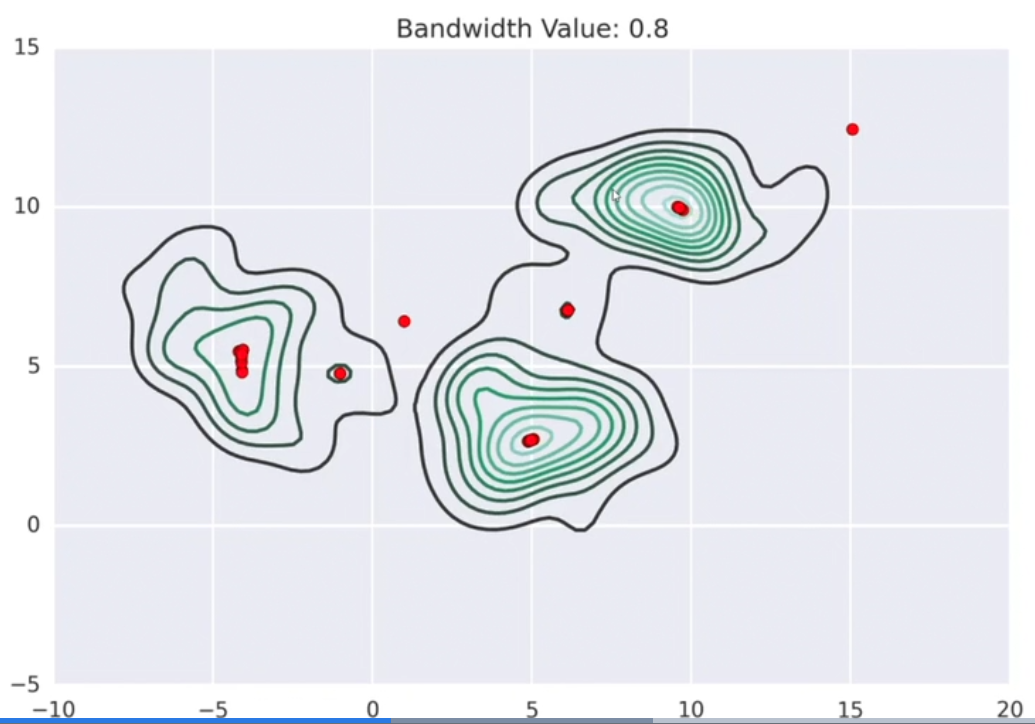


Exemplo: Pega um ponto, faz uma circunferência ao redor, verifica a maior densidade de pontos e move o centro do cluster para lá. Com isso, ele vai deslocando os pontos para regiões de alta densidade.

Há uma complexidade matemática por trás, mas a ideia é:

Buscar regiões de alta densidade e deslocar os centro dos cluster para ela.

O único parâmetro que podemos mexer nele é a largura de banda (BANDWIDTH value), que basicamente define qual a região, para cada ponto que a gente pegar, que vamos analisar densidade.

Então no DBSCAN definimos o EPS (que define uma circunferência), e aqui no Mean-Shift definimos o BANDWIDTH (largura de banda), ou seja, o tamanho da região na qual vou calcular a média dos pontos e a densidade.

Na imagem abaixo, tenho o BANDWIDTH como 0.8, de modo que os pontos destacados em amarelo ficaram como ruído:

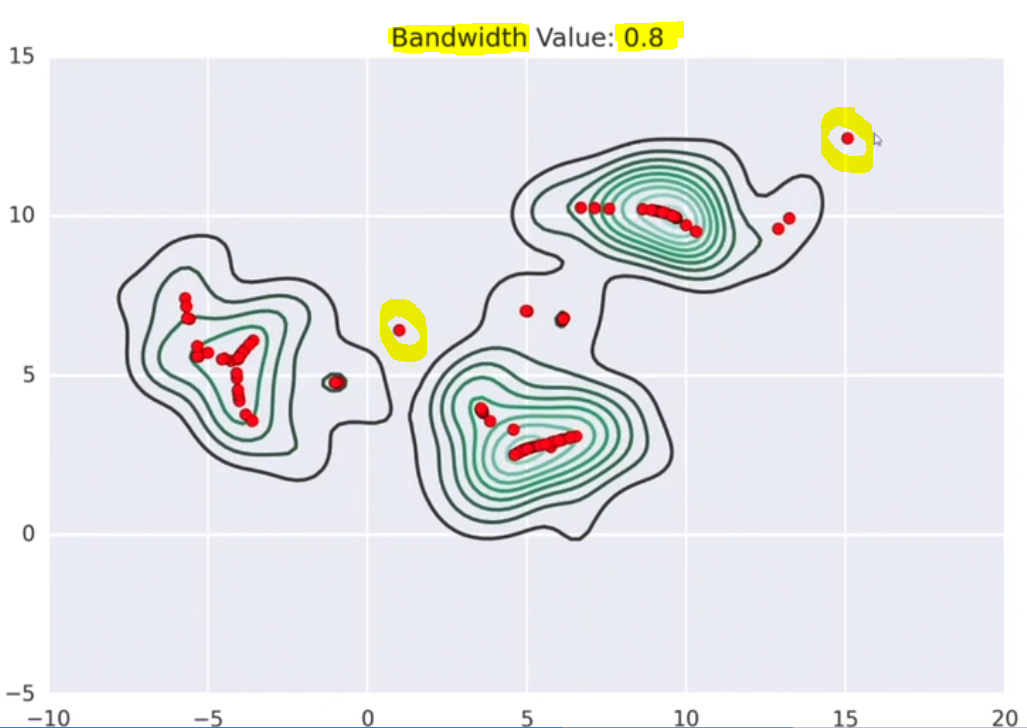





Mas se aumentarmos o BANDWIDTH para 2, esses pontos que eram ruído se movem e vão em direção a apenas 3 clusters:

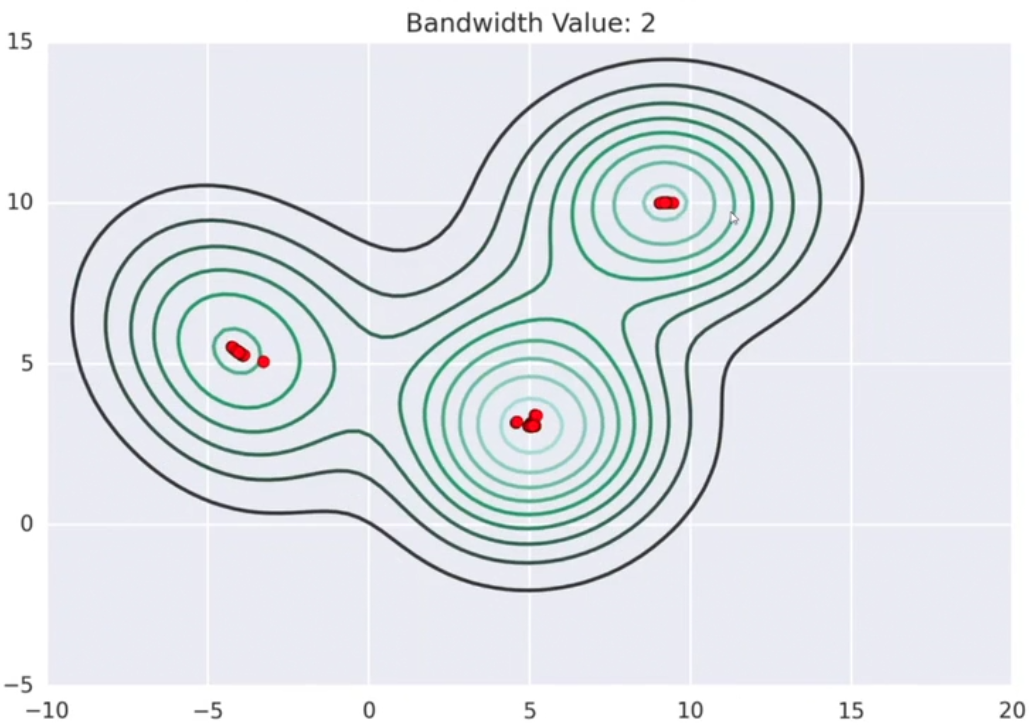


No caso anterior (vide imagem com BANDWIDTH com 0.8), tivemos 5 clusters.

Portanto, quanto mais aumento a largura de banda (BANDWIDTH), maior região estou analisando para calcular a densidade de pontos e, com isso, acabo tendo um nº menor de clusters.

O OBJETIVO

Agrupar os pontos de acordo com as regiões de alta densidade.

POR QUE UTILIZAR?

- O K-means não costuma apresentar um bom resultado quando há ruído e grupos de simetria não radial.

- Tem menos parâmetros para serem ajustados que o DBSCAN (lembrando: EPS, MIN_SAMPLES e METRIC - distância). Já no Mean-Shift, o único parâmetro que podemos mexer é o BANDWIDTH (largura de banda).

VANTAGENS

- Robusto a outlier (portanto robusto a ruídos e pontos fora da curva)

- Serve para vários tipos de aplicações (muito usado para segmentação de imagem, campo em que esse algoritmo foi bem desenvolvido. Bastante utilizado em visão computacional)

- Pode detectar qualquer tipo de forma (se colocar largura de banda menor, acaba detectando formas mais estranhas, já larguras maiores tende a ter formas com simetria mais radial).

- Tem apenas um parâmetro para ser ajustado (BANDWIDTH = largura de banda)


DESVANTAGENS

- Não funciona bem com dados de alta dimensionalidade, ou seja, muitos atributos. (pois utiliza uma métrica de distância para cálculo, assim como outros algoritmos)

- A parametrização da largura de banda (BANDWIDTH) não é tão simples (é preciso estimar mais ou menos a densidade dos pontos e os valores da localização dos pontos baseado em alguns recursos estatísticos)

- Computacionalmente caro (todo ponto no início é tratado como um cluster. Portanto, se no início eu tiver 1 milhões de pontos, terei 1 milhão de clusters. E repetirei o processo para cada ponto até que ele convirja)

##Variando os parâmetros do Mean-Shift

Como vimos, o Mean-Shift é um algoritmo de clusterização não paramétrico. De tal modo, nã precisamos passar parâmetro para ele funcionar.

O problema é que pode não funcionar muito bem se não passarmos parâmetro (bandwidth).

Lembrando: a largura de banda (bandwidth), define a região na qual realizaremos o deslocamento de média, ou seja, região, a partir do centro do cluster, na qual calcularemos a média e então deslocaremos o centro do cluster para a região de alta densidade.

Para fazermos um teste de como nossa clusterização varia com a largura de banda, vamos usar uma função pronta do sklearn:


In [ ]:
from sklearn.cluster import estimate_bandwidth

Passamos para a função um 'x', que é o nosso dataframe, e um parâmetro chamado 'quantil'.

E como funciona? O que ela vai fazer?

Passarei para a função nosso dataframe (df), e ela vai calcular a distância entre todos os pontos. Ex.: Digamos que calculou a distância entre pontos 1 e 2 e achou a distâcia de 3 entre eles. Depois calculou com demais pontos: 

Distâncias obtidas: 3, 7, 5, 1, 9.

Então ela ordena essas distâncias em ordem crescente:

Distâncias ordenadas: 1, 3, 5, 7, 9.

Quando eu defino o 'quantil', defino qual parte (ou qual ponto dessa sequência irei pegar).

Se eu definir um quantil = 0.5, estarei pegando o ponto do meio da sequência de distâncias ordenada, no caso o 5.

Quanto menor o valor do quantil, mais próximo estou do início da fila das distâncias ordenadas.

Quanto maior o valor do quantil, mais próximo estou do fim da fila das distâncias ordenadas.

Vamos ver agora o efeito que o quantil causa na hora de estimar a bandwidth:


In [ ]:
#Estimando a Bandwidth (BW)
#Passamos para a função um 'x', que é o nosso dataframe, e o parâmetro quantil
BW = estimate_bandwidth(df, quantile = 0.1)
#E agora vamos ver quanto fica o valor da bandwidth
print(BW)

63.180850991985075


Esse quantil de 0.1 seria como eu estivesse pegando o valor 1 da lista acima de distâncias ordenadas.

Se eu aumentar o valor do quantil para 0.8(pegar um valor mais alto nas distâncias ordenadas), vou esperar que a bandwidth (BW) suba. Seria como eu tivesse pegando o valor 9 na lista acima de distâncias ordenadas.

In [ ]:
BW = estimate_bandwidth(df, quantile = 0.8)
#E agora vamos ver quanto fica o valor da bandwidth
print(BW)

558.7029604054767


Vamos então voltar com um valor pequeno de quantil e criar nosso agrupador Mean-Shift.

In [ ]:
BW = estimate_bandwidth(df, quantile = 0.1)
agrupador = MeanShift(bandwidth=BW) #passando a largura de banda estimada com a função
agrupador.fit(df) #clusterizando os dados
agrupador.labels_ #verificando os clusters

array([ 4,  4,  8,  9,  5,  9,  7,  7,  4,  4,  9,  7,  7,  8,  9,  7,  7,
        8, 10,  6,  5,  5,  4,  4,  6,  6,  8,  7,  6,  4,  7,  9,  4,  7,
        8,  6,  6,  8,  4,  5,  5,  4,  8,  1,  6,  4,  4,  4,  4,  7,  8,
        7,  8,  7,  4,  8,  4,  7,  7,  0,  1,  3,  1,  3,  3,  1,  0,  0,
        5,  5,  6,  3,  3,  4,  6,  3,  3,  0,  5,  3,  3,  1,  1,  0,  0,
        3,  0,  2,  1,  1,  0,  3,  0,  3,  3,  6,  1,  3,  1,  3,  1,  2,
        3,  3,  1,  3,  0,  0,  3,  1,  2,  3,  2,  3,  3,  3,  0,  3,  3,
        2,  1,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  0,  2,  2,  1,  1,
        1,  0,  2,  2,  2,  5,  0,  2,  6,  6,  3,  1,  1,  2,  0,  0,  3,
        1,  1,  5,  0,  6,  1,  1,  0,  1,  2,  1,  1,  0,  1,  1,  5,  1,
        0,  3,  1,  5,  5,  6,  6,  2])

In [ ]:
import numpy as np

#Verificar o nº de clusters
np.unique(agrupador.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Note que foram criados muitos clusters (11).

E porque isso aconteceu?

Como nossa região de busca dentro do Mean-Shift, ou seja, nossa região de cálculo da média e deslocamento ficou muito pequena, acabei gerando vários clusters. O centro dos nossos clusters quase não caminharam, não se agruparam muito.

Se colocarmos um valor grande no quantil, esperamos que aconteça o contrário: que eu tenha 2 clusters ou 1.

Note que se o quantil for de 0.8, terei apenas 1 cluster.


In [ ]:
BW = estimate_bandwidth(df, quantile = 0.8)
agrupador = MeanShift(bandwidth=BW) #passando a largura de banda estimada com a função
agrupador.fit(df) #clusterizando os dados
agrupador.labels_ #verificando os clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Esse retorno de 1 clusters já era esperado, pois se ue pegar uma região muito grande, é como se todos os clusters fossem para o mesmo ponto, pois na hora de fazer a média, acabo agrupando todos os pontos juntos, de modo que todo mundo seria deslocado para a mesma região de alta densidade.

PORTANTO: 

- Quantil grande => gera => valor grande de largura de banda => consequência => poucos clusters.

- Quantil pequeno => gera => valor pequeno de largura de banda => consequência => muitos clusters.

Se rodarmos o Mean-Shift sem largura de banda (como fizemos no início), veremos que temos 3 clusters.

In [ ]:
agrupador = MeanShift() #passando a largura de banda estimada com a função
agrupador.fit(df) #clusterizando os dados
agrupador.labels_ #verificando os clusters

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
#Verificar o nº de clusters
np.unique(agrupador.labels_)

array([0, 1, 2])

Vamos tentar alterar o quantil para obtermos um nº próximo de 3 clusters.

In [ ]:
BW = estimate_bandwidth(df, quantile = 0.3)
agrupador = MeanShift(bandwidth=BW) #passando a largura de banda estimada com a função
agrupador.fit(df) #clusterizando os dados
agrupador.labels_ #verificando os clusters

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
#Verificar o nº de clusters
np.unique(agrupador.labels_)

array([0, 1, 2])

Portanto, o valor que do quantil que o algoritmo Mean-Shift está usando no 'automático' deve ser algo próximo de 0.3.

CONCLUSÃO:

- O quantil define o tamanho da região de busca:

  - quantil PEQUENO => região de busca (largura de banda) PEQUENA  => MUITOS clusters
  
  - quantil GRANDE => região de busca (largura de banda) GRANDE => POUCOS clusters

Assim como para o K-means, é possível acessar o centro dos clústeres gerados pelo Mean shift. Para tal podemos fazer:

In [ ]:
agrupador.cluster_centers_

array([[1.26765306e+01, 2.56051020e+00, 2.34071429e+00, 2.06602041e+01,
        9.50000000e+01, 2.01673469e+00, 1.53959184e+00, 4.02857143e-01,
        1.40938776e+00, 5.00591836e+00, 9.01734694e-01, 2.30122449e+00,
        5.62153061e+02, 2.40816327e+00],
       [1.34230435e+01, 2.31521739e+00, 2.40500000e+00, 1.84217391e+01,
        1.08956522e+02, 2.49282609e+00, 2.30630435e+00, 3.18913043e-01,
        1.71260870e+00, 5.20934783e+00, 9.65130435e-01, 2.90717391e+00,
        9.18434783e+02, 1.52173913e+00],
       [1.37555000e+01, 1.89075000e+00, 2.42200000e+00, 1.71350000e+01,
        1.04950000e+02, 2.80575000e+00, 2.94800000e+00, 2.84750000e-01,
        1.87025000e+00, 5.45800000e+00, 1.07175000e+00, 3.13150000e+00,
        1.14037500e+03, 1.02500000e+00]])

E então criar um gráfico 3 D de forma semelhante a realizada pelo k-means, Criando a figura:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y=df['Alcool'], z=df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Adicionando o nome aos eixos:

In [ ]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

Extraindo os centros:

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos

In [ ]:
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,12.676531,2.560510,2.340714,20.660204,95.000000,2.016735,1.539592,0.402857,1.409388,5.005918,0.901735,2.301224,562.153061,2.408163
1,13.423043,2.315217,2.405000,18.421739,108.956522,2.492826,2.306304,0.318913,1.712609,5.209348,0.965130,2.907174,918.434783,1.521739
2,13.755500,1.890750,2.422000,17.135000,104.950000,2.805750,2.948000,0.284750,1.870250,5.458000,1.071750,3.131500,1140.375000,1.025000


Adicionando-os ao gráfico:

In [ ]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y=centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))

Para mais referências de outros atributos e parâmetros do Mean shift, podemos consultar a documentação oficial da biblioteca sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#examples-using-sklearn-cluster-meanshift


#5. Coeficiente de silhueta para avaliação de clusterizações

O que será visto:

- Importar a biblioteca do Coeficiente de Silhueta;

- Definir os parâmetros do K-means e do Mean shift através do coeficiente de silhueta através da visualização gráfica de como esse parâmetro varia com os coeficientes.


##Introdução ao coeficiente de silhueta

Após realizar todos os tipos de clusterização (K-means, DBSCAN e Mean-Shift), gostaríamos saber se há alguma métrica para indicar se a clusterização é boa, pois temos algumas incertezas durante a clusterização.

Para entendermos esse problema, vamos criar um agrupador K-means.

Antes, vamos recarregar o arquivo.

In [1]:
import pandas as pd

#Recarregando o arquivo
df = pd.read_csv('Wine.csv')

In [2]:
#Renomear as colunas
df = df.rename(columns = {'Alcohol': 'Alcool', 'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor',
                            })

In [4]:
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters = 4)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([3, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 1, 1,
       3, 3, 1, 1, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2], dtype=int32)

Como podemos ver, temos 4 grupos, já que indicamos 'n_clusters' = 4.

Vamos colocar esses 4 grupos num gráfico.

In [6]:
import numpy as np
import plotly.graph_objects as go

#cria uma figura
fig = go.Figure() 
#adiciona um traço
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Note, por exemplo, que há pontos no cluster amarelo muito próximos de pontos roxos, assim como de azul.

Nesse contexto surge uma dúvida: Será que esse ponto amarelo não deveria pertencer ao roxo?

E aí fica sempre esse dúvida.

Uma maneira de se avaliar isso é por meio da métrica coeficiente de silhueta. Há outras também, mas essa é uma ótima métrica. 

Basicamente, ela analisa o quanto os pontos do nosso cluster estão próximos uns dos outros, e afastados dos pontos do cluster vizinho.

##Introdução ao Coeficiente de Silhueta - Parte 2

O PROBLEMA

Como avaliar se a clusterização realizada está boa ou não?

(E aqui estamos falando de clusterização por distância, pois todos os modelos que vimos utilizam métrica de distância: calculam a distância entre os pontos para chegar ao resultado final da clusterização)



EXEMPLO

Veja na imagem abaixo que as casas foram clusterizadas em 3 bairros.

Mas será que faz sentido?

Note que a casa amarela parece um tanto distante das casas do próprio bairro B (coesão), e mais próximo das casas do bairro A (dissimilaridade).

Portanto, talvez essa não seja a melhor clusterização. Talvez seja possível termos apenas 2 bairros, e não 3.
É isso que o coeficiente de silhueta vai avaliar.

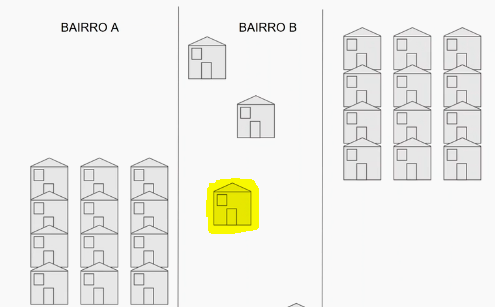

O OBJETIVO

Avaliar os pontos em uma escala de -1 a 1 em relação:

- ao grupo (coesão)

- aos demais pontos (dissimilaridade)

Quanto maior o valor da silhueta dos pontos, melhor. Ou seja, quanto maior a coesão e maior a similaridade, melhor, pois mais bem agrupado estão os meus pontos, segundo os critérios de distância.

##Coeficiente de Silhueta K-means

In [8]:
#Importar a biblioteca
from sklearn.metrics import silhouette_score #devolve o valor do coeficiente de silhueta médio

Vamos começar criando uma faixa na qual iremos variar os clusters.

In [9]:
#Criar uma lista variando  o nº de clusters de 2 a 9
faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
#Importar o k-means
from sklearn.cluster import KMeans
#Criar uma lista vazia para armazenarmos os valores dos coeficientes de silhueta para cada k ('n_clusters')
valores_silhueta = []
#Fazer o loop para testar vários valores de k no k-means e pegar o valor de silhueta de cada um
for k in faixa_n_clusters:
  agrupador = KMeans(n_clusters = k)
  labels = agrupador.fit_predict(df) #o fit_predict devolve direto os labels
  media_silhueta = silhouette_score(df, labels) #passa o dataframe df e os labels
  valores_silhueta.append(media_silhueta) #Acresce o valor da silhueta à lista vazia

Vamos agora criar o gráfico, utilizando novamente o plotly

In [11]:
#cria a figura
fig = go.Figure()
#adiciona um traço à figura
fig.add_trace(go.Scatter(x = faixa_n_clusters,
                         y = valores_silhueta))
#Colocar o nome dos eixos
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de clústeres",
    yaxis_title = "Valor médio de silhueta"
)

Analisando o gráfico: Como podemos perceber, o maior valor do coeficiente de silhueta é quando o nº de clústeres é igual a 2. Nem adianta aumentar o nº de clusteres pois o valor da silhueta vai caindo.

OBS.: No K-Means não faz sentido 1 cluster, pois nem seria possível calcular o coeficiente de silhueta, pois não vamos ter nenhum outro ponto em outro cluster para comparar a que cluster o ponto mais pertence.

##Coeficiente de Silhueta Mean-Shift

Agora vamos determinar qual é o maior valor do coeficiente de silhueta para o Mean-Shift, lembrando que o único parâmetro que alteramos neste algoritmo é o quantil (

Para isso, precisaremos criar uma faixa de quantil. (Lembrando que esse quantil utilizaremos para calcular o valor da largura de banda - bandwidth)

In [12]:
#criando um espaço linear, começando em 0.02, com máximo de 0.5 - que corresponde à mediana do quantil, pegando 15 pontos nesse intervalo
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil #criamos então um array numpy com 15 posições, que usaremos para calcular os valores dos coeficientes de silhueta


array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [14]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth


#Criar uma lista vazia para armazenarmos os valores dos coeficientes de silhueta
valores_silhueta = []
#Fazer o loop para testar vários valores de bandwidth, a partir dos valores dos quantis.
#E pegar o valor de silhueta de cada um
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile = quantil)
  agrupador = MeanShift(bandwidth = bandwidth)
  labels = agrupador.fit_predict(df) #o fit_predict devolve direto os labels
  
  media_silhueta = silhouette_score(df, labels) #passa o dataframe df e os labels
  valores_silhueta.append(media_silhueta) #Acresce o valor da silhueta à lista vazia

ValueError: ignored

Note que aconteceu um erro. Ele disse que o nº de labels = 1 não é válido. O nº de labels tem que ser sempre maior que 2. E porque acontece?

Quando calculamos os coeficientes de silhueta, precisamos ter pelo menos 2 labels (clústeres). Se eu só tenho 1 label (cluster), até consigo calcular a coesão, mas não a dissimilaridade (diferença em relação ao grupo vizinho), já que não há outro grupo/cluster.

Outro problema: quando tenho o nº de clusteres igual ao nº de dados. Isso fará com que o coeficiente de silhueta também não consiga ser calculado, pois consigo calcular a dissimilaridade, mas não a coesão.

Então, teremos que adicionar um if no loop, que vai chegar se o nº de labels é igual E se ele é menor que o nº de amostras que temos no dataframe.

Ajustando o loop anterior:

In [19]:
#Criar uma lista vazia para armazenarmos os valores dos coeficientes de silhueta
valores_silhueta = []
quantil_plot = [] #para armazenar os valores dos quantil para os quais conseguiremos calcular o valor do coeficiente de silhueta
#Fazer o loop para testar vários valores de bandwidth, a partir dos valores dos quantis.
#E pegar o valor de silhueta de cada um
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile = quantil)
  agrupador = MeanShift(bandwidth = bandwidth)
  labels = agrupador.fit_predict(df) #o fit_predict devolve direto os labels
  #Se o nº de labels (clusteres) for menor que o tamanho do dataframe (ou seja, tenho que ter menos labels que o tamanho dos dados de grupo)
  #E o nº de labels (clusteres) tem que ser maior que 1
  if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
    media_silhueta = silhouette_score(df, labels) #passa o dataframe df e os labels
    valores_silhueta.append(media_silhueta) #Acresce o valor da silhueta à lista vazia
    quantil_plot.append(quantil)

Vamos plotar o gráfico:

In [20]:
#Queremos ver o valor de quantil pelo valor de silhueta. Gráfico 2D
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(dict(xaxis_title = "Quantil",
                       yaxis_title = "Média Silhueta"))
fig.show()

Como podemos ver, o maior valor do coeficiente de silhueta foi 0.649 para os quantis 0.36, 0.39, 0.43 e 0.46.

Como rodamos o processo com 15 valores de quantil, vamos aumentar para 30 e termos um gráfico com mais pontos.

In [21]:
#criando um espaço linear, começando em 0.02, com máximo de 0.5 - que corresponde à mediana do quantil, pegando 30 pontos nesse intervalo
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil #criamos então um array numpy com 30 posições, que usaremos para calcular os valores dos coeficientes de silhueta

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

Rodando o loop com a faixa quantil de 30 valores.

In [22]:
#Criar uma lista vazia para armazenarmos os valores dos coeficientes de silhueta
valores_silhueta = []
quantil_plot = [] #para armazenar os valores dos quantil para os quais conseguiremos calcular o valor do coeficiente de silhueta
#Fazer o loop para testar vários valores de bandwidth, a partir dos valores dos quantis.
#E pegar o valor de silhueta de cada um
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile = quantil)
  agrupador = MeanShift(bandwidth = bandwidth)
  labels = agrupador.fit_predict(df) #o fit_predict devolve direto os labels
  #Se o nº de labels (clusteres) for menor que o tamanho do dataframe (ou seja, tenho que ter menos labels que o tamanho dos dados de grupo)
  #E o nº de labels (clusteres) tem que ser maior que 1
  if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
    media_silhueta = silhouette_score(df, labels) #passa o dataframe df e os labels
    valores_silhueta.append(media_silhueta) #Acresce o valor da silhueta à lista vazia
    quantil_plot.append(quantil)

Plotando o gráfico com 30 pontos:

In [23]:
#Queremos ver o valor de quantil pelo valor de silhueta. Gráfico 2D
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(dict(xaxis_title = "Quantil",
                       yaxis_title = "Média Silhueta"))
fig.show()

Esse processo com mais valores de quantil nem sempre é necessário. Rodamos pois havia uma ligeira melhora do coeficiente de silhueta à medida que aumentava o quantil.

Note que aumentando o teste com 30 quantis, vimos que o coeficiente de silhueta manteve-se praticamente estável em 0.64 para os quantis a partir de 0.35.

Portanto, o valor do quantil de 0.35 é o que consegue maximizar o valor do coeficiente de silhueta (0.64) em nossa aplicação de clusterização.

Esse valor de 0.64 ainda um pouco distante do 1, e pode indicar que o Mean-Shift não seja o melhor método para clusterizar nossos dados.

##Mean-Shift, DBSCAN e K-Means comparados

Agora que já definimos os melhores parâmetros para todos os nossos métodos para atingirmos a melhor clusterização possível para cada um deles, faremos uma comparação entre eles. 

Primeiro vamos reimportar tudo que usamos.

In [24]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [40]:
#Criando os agrupadores com os melhores parâmetros obtidos anteriormente
agrupador_kmeans = KMeans(n_clusters = 2)
agrupador_DBSCAN = DBSCAN(eps = 35, min_samples = 10, metric = "manhattan") #não tenho certeza se foram esses os melhores parâmetros

BW = estimate_bandwidth(df, quantile = 0.35)
agrupador_meanshift = MeanShift(bandwidth=BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)


print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN:  [-1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0  2  1 -1 -1  3 -1  1  2  2 -1 -1 -1  3
  2 -1 -1  3  3  2 -1  2 -1 -1 -1  2  2 -1  2 -1  1 -1  2  2  2 -1 -1 -1
 -1  3  1  3 -1 -1  3  3  1 -1  2  2 -1  1 -1 -1 -1  3  3  3  2 -1  3 -1
 -1 -1 -1  3  3  3 -1  2 -1 -1 -1  2 -1 -1  1  1 -1  2 -1 -1 -1 -1  2 -1
 -1 -1  3 -1 -1 -1 -1 -1 -1  1 -1 -1  2 -1  1 -1  2  1 -1  1 -1  2  1  1
 -1 -1  2  2  1 -1 -1 -1 -1 -1]
Labels MeanShift:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 

Como visto, os resultados foram bem diferentes.

Essa diferença ocorre pois a forma de criação dos clusteres por cada um dos métodos é diferente. Com isso, o resultado para dar o maior resultado do coeficiente de silhueta também é diferente.

Provavelmente, o DBSCAN, por ter considerado tudo ruído, não seja adequado para agrupar o tipo de dados que temos.
Mas vamos verificar isso através do coeficiente de silhueta.

In [41]:
print("O coeficiente de silhueta do K-Means é: ", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df, labels_dbscan))
print("O coeficiente de silhueta do MeanShift é: ", silhouette_score(df, labels_meanshift))


O coeficiente de silhueta do K-Means é:  0.6568490946514269
O coeficiente de silhueta do DBSCAN é:  -0.10475680599942853
O coeficiente de silhueta do MeanShift é:  0.6493586170880333


Sempre que for aplicar clusterização, o ideal é aplicar várias técnicas e analisar o coeficiente de silhueta. Ás vezes, uma técnica pode ficar bem aquem em relação a outra, e isso pode ter relação com a alta dimensionalidade dos seus dados.

##Parâmetros DBSCAN através do coeficiente de silhueta

Assim como para o K-means e o Mean shift, é possível definir os melhores valores para os parâmetros eps e min_samples. Todavia, como são dois parâmetros, a visualização é um pouco mais difícil. Para vermos como fazer isso, vamos primeiro carregar os dados e normalizá-los:

In [2]:
import pandas as pd

#Carregando o arquivo
df = pd.read_csv('Wine.csv')

In [3]:
#Passar o nome de alguns atributos para português, para facilitar inclusive para outras pessoas...
#...que venham a trabalhar com esses dados
df = df.rename(columns = {'Alcohol': 'Alcool', 'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor',
                            })

Normalização StandardScaler

In [4]:
from sklearn import preprocessing

atributos = df.columns

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18,-9.056426e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-1.213944e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-1.213944e+00
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,7.996036e-02
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,1.373864e+00
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,1.373864e+00


In [8]:
from sklearn.cluster import DBSCAN

#Intanciar o agrupador
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan') 

In [5]:
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

Precisaremos utilizar dois for: Um para variar o 'min_samples' e o outro para variar o 'faixa_eps'.

Vamos criar um for dentro do outro de modo que para cada valor de 'min_samples' possamos variar toda a faixa de eps. Outro ponto interessante ao qual devemos atentar é que a silhueta não pode ser calculada quando o número de clústeres é igual a 1 ou igual ao número de dados, no caso 178. 

No primeiro caso não existem vizinhos para comparar o grau de pertença ao grupo. No segundo caso cada cluster só possui um ponto, então, não é possível calcular a semelhança do mesmo com ele mesmo e com os demais. 

Para evitar esses problemas, então, colocaremos um if, ou "se”, que basicamente avaliará se o número de labels é diferente de 1 e de 178. 

Se sim, ele calculará a silhueta. Para contar o número de labels, utilizaremos uma função chamada counter da biblioteca collections, que retorna um array onde a primeira posição é o valor e a segunda é o número de ocorrências ou o número de repetições.

In [11]:
from collections import Counter

O número de objetos se encontra na primeira posição do array retornado pela função. Assim sendo, devemos fazer Counter(labels)[0], que retornará o número de diferentes valores dentro do counter ou o número de labels diferentes.

In [13]:
from sklearn.metrics import silhouette_score

valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(df)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(df) and Counter(labels)[0] > 1): #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(df, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

Para desenhar o gráfico, iremos dessa vez adicionar nome aos eixos. 

Para fazer isso, utilizaremos o método update layout. 

Além disso, podemos marcar o ponto no qual o coeficiente de silhueta possui o maior valor, adicionando os atributos marker_line_color="midnightblue" e marker_symbol[‘x’] para marcar um x na cor azul no ponto que dá o maior valor do coeficiente de silhueta.

In [15]:
import plotly.graph_objects as go

ind = valores_silhueta.index(max(valores_silhueta))
#@title Default title text
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhueta)],
                         mode = 'markers',marker_line_color="midnightblue", 
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhueta,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()

O ponto com maior silhueta apresenta os melhores valores para eps e min_samples. Para saber de maneira numérica e não gráfica esses valores, é possível fazer:

In [16]:
# pega o índice do maior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))
# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print(eps_plot[ind])
print(min_samples_plot[ind])

9.5
26


Por fim, o maior valor do coeficiente de silhueta é:

In [17]:
print(max(valores_silhueta))

0.2691068771020587
